<a href="https://colab.research.google.com/github/datainworld/brunch/blob/master/%EB%B8%8C%EB%9F%B0%EC%B9%98_%EC%83%9D%ED%99%9C%EC%9D%B8%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.환경설정

## 0.1. 라이브러리 임포트

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##0.2. colab 차트 한글 설정

In [2]:
# 아래와 같이 설정후, 한글이 제대로 동작되려면 메뉴에서 '런타임 > 런타임 다시시작...'을 다시 실행해야 한다 
import matplotlib as mpl
import matplotlib.font_manager as fm
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


# 1.데이터 전처리

## 1.1. 집계구 단위 데이터

### 1.1.1. 데이터 로딩

In [0]:
path = '/content/drive/My Drive/Datas/brunch/생활인구/'

# 복잡한 컬럼명을 단순화한다.
cols = ['날짜', '시간', '행정동', '집계구', '합계',
'남0_9','남10_14','남15_19','남20_24','남25_29','남30_34','남35_39','남40_44','남45_49','남50_54','남55_59','남60_64','남65_69','남70이상',
'여0_9','여10_14','여15_19','여20_24','여25_29','여30_34','여35_39','여40_44','여45_49','여50_54','여55_59','여60_64','여65_69','여70이상']

# 2018년 집계구 단위 생활인구 데이터 
local_2018 = pd.read_csv(path + 'LOCAL_PEOPLE_20181006.csv', names=cols, header=0, na_values='*') # 컬럼명을 변경하고, '*' 로 기록된 값을 null로 대체한다. 

# 2019년 집계구 단위 생활인구 데이터 
local_2019 = pd.read_csv(path + 'LOCAL_PEOPLE_20190928.csv', names=cols, header=0, na_values='*') # 컬럼명을 변경하고, '*' 로 기록된 값을 null로 대체한다. 

# 집회지역 집계구 코드 데이터
area_cd = pd.read_csv(path + '집회지역 집계구.csv', encoding='cp949')


In [4]:
local_2018.tail(3)

,날짜,시간,행정동,집계구,합계,남0_9,남10_14,남15_19,남20_24,남25_29,남30_34,남35_39,남40_44,남45_49,남50_54,남55_59,남60_64,남65_69,남70이상,여0_9,여10_14,여15_19,여20_24,여25_29,여30_34,여35_39,여40_44,여45_49,여50_54,여55_59,여60_64,여65_69,여70이상
459654,20181006,6,11740540,1125054010001,424.0,11.0,11.0,21.0,15.0,12.0,9.0,9.0,9.0,22.0,17.0,16.0,20.0,8.0,18.0,14.0,14.0,14.0,12.0,8.0,5.0,13.0,13.0,26.0,19.0,21.0,16.0,12.0,23.0
459655,20181006,7,11740540,1125054010001,460.0,10.0,10.0,24.0,16.0,10.0,8.0,6.0,11.0,21.0,20.0,17.0,19.0,11.0,24.0,15.0,15.0,17.0,16.0,9.0,7.0,17.0,16.0,29.0,21.0,17.0,19.0,14.0,28.0
459656,20181006,8,11740540,1125054010001,482.0,7.0,8.0,29.0,12.0,12.0,10.0,7.0,13.0,19.0,22.0,17.0,17.0,9.0,18.0,15.0,15.0,18.0,17.0,12.0,9.0,15.0,19.0,26.0,24.0,20.0,20.0,14.0,42.0


In [5]:
local_2019.tail(3)

,날짜,시간,행정동,집계구,합계,남0_9,남10_14,남15_19,남20_24,남25_29,남30_34,남35_39,남40_44,남45_49,남50_54,남55_59,남60_64,남65_69,남70이상,여0_9,여10_14,여15_19,여20_24,여25_29,여30_34,여35_39,여40_44,여45_49,여50_54,여55_59,여60_64,여65_69,여70이상
459473,20190928,23,11740700,1125071022501,1395.0,51.0,26.0,32.0,28.0,31.0,41.0,49.0,71.0,61.0,34.0,54.0,52.0,48.0,75.0,59.0,32.0,37.0,33.0,35.0,38.0,54.0,48.0,64.0,54.0,85.0,59.0,52.0,78.0
459474,20190928,23,11740700,1125071022701,238.0,14.0,7.0,8.0,9.0,5.0,5.0,5.0,7.0,9.0,5.0,13.0,7.0,5.0,10.0,8.0,4.0,8.0,5.0,6.0,6.0,9.0,9.0,9.0,9.0,11.0,8.0,10.0,13.0
459475,20190928,23,11740700,1125071023701,628.0,16.0,8.0,18.0,13.0,13.0,21.0,27.0,18.0,22.0,21.0,25.0,20.0,11.0,36.0,28.0,15.0,21.0,20.0,17.0,21.0,30.0,32.0,35.0,28.0,25.0,22.0,16.0,38.0


In [6]:
area_cd.tail(3)

,TOT_REG_CD,ADM_NM,ADM_CD
9,1122053040002,서초3동,1122053
10,1122053050001,서초3동,1122053
11,1122053050002,서초3동,1122053


### 1.1.2. 분석 범위 데이터 추출

In [7]:
# 집계구 코드만을 Series 형식으로 추출
area_list = area_cd.TOT_REG_CD
area_list.tail(3)

9     1122053040002
10    1122053050001
11    1122053050002
Name: TOT_REG_CD, dtype: int64

In [8]:
# isin 메소드로 해당 집계구의 데이터만 추출
# query 메소드로 7시부터 23시까지 데이터만 추출
# sort_values 메소드로 시간, 집계구 순으로 데이터 정렬
# reset_index 메소드를 이용하여 데이터프레임 형식으로 정렬

local_2018_sel = local_2018[local_2018['집계구'].isin(area_list)].query('시간 >= 7').sort_values(['시간', '집계구']).reset_index(drop=True)
local_2018_sel.tail(3)

,날짜,시간,행정동,집계구,합계,남0_9,남10_14,남15_19,남20_24,남25_29,남30_34,남35_39,남40_44,남45_49,남50_54,남55_59,남60_64,남65_69,남70이상,여0_9,여10_14,여15_19,여20_24,여25_29,여30_34,여35_39,여40_44,여45_49,여50_54,여55_59,여60_64,여65_69,여70이상
201,20181006,23,11650530,1122053040002,679.0,NaN,NaN,9.0,30.0,30.0,29.0,36.0,31.0,9.0,42.0,23.0,18.0,12.0,28.0,13.0,7.0,42.0,31.0,32.0,30.0,39.0,33.0,28.0,16.0,38.0,14.0,12.0,29.0
202,20181006,23,11650530,1122053050001,838.0,27.0,17.0,29.0,19.0,26.0,29.0,20.0,35.0,41.0,18.0,32.0,21.0,14.0,38.0,36.0,20.0,67.0,30.0,29.0,37.0,28.0,37.0,36.0,27.0,30.0,19.0,29.0,33.0
203,20181006,23,11650530,1122053050002,468.0,14.0,8.0,16.0,11.0,16.0,21.0,14.0,19.0,19.0,15.0,15.0,14.0,5.0,20.0,21.0,11.0,22.0,14.0,13.0,15.0,11.0,16.0,25.0,19.0,20.0,12.0,17.0,30.0


### 1.1.3. 데이터 구조화

In [9]:
# 사용하지 않는 컬럼은 모두 삭제 
local_2018_sel.drop(columns=['날짜', '행정동', '집계구', '합계'], axis=1, inplace=True)
local_2018_sel.tail(3)

,시간,남0_9,남10_14,남15_19,남20_24,남25_29,남30_34,남35_39,남40_44,남45_49,남50_54,남55_59,남60_64,남65_69,남70이상,여0_9,여10_14,여15_19,여20_24,여25_29,여30_34,여35_39,여40_44,여45_49,여50_54,여55_59,여60_64,여65_69,여70이상
201,23,NaN,NaN,9.0,30.0,30.0,29.0,36.0,31.0,9.0,42.0,23.0,18.0,12.0,28.0,13.0,7.0,42.0,31.0,32.0,30.0,39.0,33.0,28.0,16.0,38.0,14.0,12.0,29.0
202,23,27.0,17.0,29.0,19.0,26.0,29.0,20.0,35.0,41.0,18.0,32.0,21.0,14.0,38.0,36.0,20.0,67.0,30.0,29.0,37.0,28.0,37.0,36.0,27.0,30.0,19.0,29.0,33.0
203,23,14.0,8.0,16.0,11.0,16.0,21.0,14.0,19.0,19.0,15.0,15.0,14.0,5.0,20.0,21.0,11.0,22.0,14.0,13.0,15.0,11.0,16.0,25.0,19.0,20.0,12.0,17.0,30.0


In [10]:
local_2018_melt = local_2018_sel.melt(id_vars='시간')
local_2018_melt.tail(3)

,시간,variable,value
5709,23,여70이상,29.0
5710,23,여70이상,33.0
5711,23,여70이상,30.0


In [11]:
local_2018_melt['성별'] = local_2018_melt.variable.str.slice(start=0, stop=1)
local_2018_melt['연령'] = local_2018_melt.variable.str.slice(start=1, stop=99)
local_2018_melt.drop(columns='variable', axis=1, inplace=True)
local_2018_melt

,시간,value,성별,연령
0,7,64.0,남,0_9
1,7,36.0,남,0_9
2,7,84.0,남,0_9
3,7,10.0,남,0_9
4,7,22.0,남,0_9
...,...,...,...,...
5707,23,16.0,여,70이상
5708,23,62.0,여,70이상
5709,23,29.0,여,70이상
5710,23,33.0,여,70이상


In [12]:
local_2018_result = local_2018_melt.set_index(['시간', '성별', '연령'])
local_2018_result['value'] = local_2018_result['value'].astype(float)
local_2018_result.tail(3)

value
시간 성별 연령         
23 여  70이상   29.0
      70이상   33.0
      70이상   30.0

In [13]:
local_2019_sel = local_2019[local_2019['집계구'].isin(area_list)].query('시간 >= 7').sort_values(['시간', '집계구']).reset_index(drop=True)
local_2019_sel.drop(columns=['날짜', '행정동', '집계구', '합계'], axis=1, inplace=True)
local_2019_melt = local_2019_sel.melt(id_vars='시간')
local_2019_melt['성별'] = local_2019_melt.variable.str.slice(start=0, stop=1)
local_2019_melt['연령'] = local_2019_melt.variable.str.slice(start=1, stop=99)
local_2019_melt.drop(columns='variable', axis=1, inplace=True)
local_2019_result = local_2019_melt.set_index(['시간', '성별', '연령'])
local_2019_result['value'] = local_2019_result['value'].astype(float)
local_2019_result.tail(3)

value
시간 성별 연령         
23 여  70이상   56.0
      70이상   45.0
      70이상   30.0

In [14]:
local_gap = local_2019_result.sub(local_2018_result).reset_index()
local_gap

,시간,성별,연령,value
0,7,남,0_9,-22.0
1,7,남,0_9,-13.0
2,7,남,0_9,41.0
3,7,남,0_9,-1.0
4,7,남,0_9,-9.0
...,...,...,...,...
5707,23,여,70이상,-6.0
5708,23,여,70이상,-17.0
5709,23,여,70이상,27.0
5710,23,여,70이상,12.0


##1.2. 행정동 단위 데이터

### 1.2.1. 데이터 로딩

In [0]:
path = '/content/drive/My Drive/Datas/brunch/생활인구/'

# 서울 外지역 인구
cols_metro = ['날짜', '시간', '행정동', '순위', '거주지', '합계',
'남10_14','남15_19','남20_24','남25_29','남30_34','남35_39','남40_44','남45_49','남50_54','남55_59','남60_64','남65_69','남70_74','남75이상',
'여10_14','여15_19','여20_24','여25_29','여30_34','여35_39','여40_44','여45_49','여50_54','여55_59','여60_64','여65_69','여70_74','여75이상',
'외국인']
metro = pd.read_csv(path + 'METRO_PEOPLE_20190928.csv', names=cols_metro, header=0, na_values='*') # 컬럼명을 변경하고, '*' 로 기록된 값을 null로 대체한다. 

# 서울 內지역 인구
cols_inner = ['날짜', '시간', '행정동', '거주지', '합계',
'남10_14','남15_19','남20_24','남25_29','남30_34','남35_39','남40_44','남45_49','남50_54','남55_59','남60_64','남65_69','남70_74','남75이상',
'여10_14','여15_19','여20_24','여25_29','여30_34','여35_39','여40_44','여45_49','여50_54','여55_59','여60_64','여65_69','여70_74','여75이상',
'외국인']
inner = pd.read_csv(path + 'INNER_PEOPLE_20190928.csv', names=cols_inner, header=0, na_values='*') # 컬럼명을 변경하고, '*' 로 기록된 값을 null로 대체한다. 

# 행정동 코드 
dong = pd.read_csv(path + '생활인구 행정동코드.csv', encoding='cp949')

# 시군구 코드
sgg = pd.read_csv(path + '생활인구 시군구코드.csv', encoding='cp949')


In [16]:
metro.tail(3)

,날짜,시간,행정동,순위,거주지,합계,남10_14,남15_19,남20_24,남25_29,남30_34,남35_39,남40_44,남45_49,남50_54,남55_59,남60_64,남65_69,남70_74,남75이상,여10_14,여15_19,여20_24,여25_29,여30_34,여35_39,여40_44,여45_49,여50_54,여55_59,여60_64,여65_69,여70_74,여75이상,외국인
628751,20190928,23,11740700,9,47000,37,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,4.0,NaN,NaN,NaN
628752,20190928,23,11740700,25,48000,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
628753,20190928,23,11740700,38,50000,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
inner.tail(3)

,날짜,시간,행정동,거주지,합계,남10_14,남15_19,남20_24,남25_29,남30_34,남35_39,남40_44,남45_49,남50_54,남55_59,남60_64,남65_69,남70_74,남75이상,여10_14,여15_19,여20_24,여25_29,여30_34,여35_39,여40_44,여45_49,여50_54,여55_59,여60_64,여65_69,여70_74,여75이상,외국인
252846,20190928,23,11740700,11680,77.4600,NaN,NaN,NaN,NaN,12.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,10.0,NaN
252847,20190928,23,11740700,11710,351.4637,13.0,10.0,NaN,15.0,31.0,17.0,11.0,NaN,14.0,7.0,10.0,21.0,17.0,18.0,NaN,7.0,NaN,19.0,17.0,12.0,10.0,18.0,7.0,10.0,16.0,8.0,7.0,7.0,12.0
252848,20190928,23,11740700,11740,2952.0208,56.0,103.0,64.0,116.0,96.0,97.0,98.0,105.0,146.0,143.0,143.0,87.0,78.0,57.0,44.0,82.0,96.0,97.0,90.0,110.0,151.0,129.0,139.0,156.0,159.0,108.0,101.0,44.0,41.0


In [18]:
dong.tail(3)

,H_DNG_CD,DO_NM,CT_NM,H_DNG_NM
421,11740570,서울,강동구,암사1동
422,11740610,서울,강동구,천호2동
423,11740685,서울,강동구,길동


In [19]:
secho3_cd = dong.query('H_DNG_NM == "서초3동"').H_DNG_CD.values[0]
secho3_cd 


11650530

In [20]:
sgg.tail(3)

,RESD_CD,RESC_NM
88,47000,경북
89,48000,경남
90,50000,제주


### 1.2.2. 서울 外지역 인구 데이터 전처리

In [21]:
# 07시부터 23시까지 서초3동에서 생활하였던 인구를 추출하고, 불필요한 컬럼은 삭제한다.
metro_sel = metro[(metro['행정동'] == secho3_cd) & (metro['시간'] >= 7)] 
metro_sel.drop(columns=['날짜', '행정동', '순위', '합계', '외국인'], inplace=True)
metro_sel.tail(3)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,시간,거주지,남10_14,남15_19,남20_24,남25_29,남30_34,남35_39,남40_44,남45_49,남50_54,남55_59,남60_64,남65_69,남70_74,남75이상,여10_14,여15_19,여20_24,여25_29,여30_34,여35_39,여40_44,여45_49,여50_54,여55_59,여60_64,여65_69,여70_74,여75이상
623742,23,47000,NaN,15.0,13.0,8.0,9.0,NaN,NaN,10.0,23.0,NaN,NaN,12.0,NaN,NaN,5.0,NaN,6.0,8.0,NaN,NaN,NaN,15.0,6.0,NaN,8.0,NaN,NaN,NaN
623743,23,48000,NaN,NaN,14.0,5.0,7.0,NaN,10.0,14.0,20.0,17.0,10.0,5.0,4.0,NaN,11.0,9.0,14.0,8.0,NaN,NaN,NaN,32.0,NaN,4.0,15.0,4.0,NaN,NaN
623744,23,50000,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,8.0,7.0,5.0,NaN,NaN,NaN,6.0,4.0,NaN,NaN,4.0,NaN,7.0,9.0,NaN,NaN,NaN,NaN,NaN


In [22]:
# 데이터의 구조를 행중심으로 변경한다.
metro_melt = metro_sel.melt(id_vars=['시간', '거주지'])
metro_melt.tail(3)

,시간,거주지,variable,value
31357,23,47000,여75이상,NaN
31358,23,48000,여75이상,NaN
31359,23,50000,여75이상,NaN


In [23]:
metro_melt.dropna(inplace=True)
metro_melt.tail(3)

,시간,거주지,variable,value
31344,23,41590,여75이상,8.0
31352,23,42000,여75이상,10.0
31356,23,46000,여75이상,8.0


In [24]:
# variable 컬럼으로부터 성별과 연령을 추출하여 컬럼을 만든다.

metro_melt['성별'] = metro_melt.variable.str.slice(start=0, stop=1)
metro_melt['연령'] = metro_melt.variable.str.slice(start=1, stop=99)
metro_melt.drop(columns='variable', inplace=True)
metro_melt.tail(3)

,시간,거주지,value,성별,연령
31344,23,41590,8.0,여,75이상
31352,23,42000,10.0,여,75이상
31356,23,46000,8.0,여,75이상


In [25]:
# sgg 테이블과 머지하여 거주지 행정구역 이름을 추가한다.

metro_result = metro_melt.merge(sgg, how='left', left_on='거주지', right_on='RESD_CD')
metro_result.tail(3)

,시간,거주지,value,성별,연령,RESD_CD,RESC_NM
17708,23,41590,8.0,여,75이상,41590,경기 화성시
17709,23,42000,10.0,여,75이상,42000,강원
17710,23,46000,8.0,여,75이상,46000,전남


###1.2.3.서울 內지역 인구 데이터 전처리

In [26]:
# 07시부터 23시까지 서초3동에서 생활하였던 인구를 추출하고, 불필요한 컬럼은 삭제한다.

inner_sel = inner[(inner['행정동']==secho3_cd) & (inner['시간']>=7)]
inner_sel.drop(columns=['날짜', '행정동', '합계', '외국인'], inplace=True)
inner_sel.tail(3)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,시간,거주지,남10_14,남15_19,남20_24,남25_29,남30_34,남35_39,남40_44,남45_49,남50_54,남55_59,남60_64,남65_69,남70_74,남75이상,여10_14,여15_19,여20_24,여25_29,여30_34,여35_39,여40_44,여45_49,여50_54,여55_59,여60_64,여65_69,여70_74,여75이상
250816,23,11680,5.0,17.0,17.0,39.0,32.0,38.0,26.0,54.0,51.0,44.0,19.0,15.0,11.0,11.0,NaN,15.0,31.0,40.0,43.0,39.0,29.0,55.0,44.0,32.0,13.0,13.0,4.0,8.0
250817,23,11710,5.0,15.0,22.0,NaN,29.0,20.0,24.0,22.0,25.0,17.0,20.0,23.0,12.0,10.0,NaN,14.0,21.0,12.0,25.0,14.0,19.0,21.0,28.0,10.0,NaN,9.0,NaN,NaN
250818,23,11740,6.0,NaN,NaN,13.0,8.0,17.0,10.0,NaN,10.0,9.0,10.0,8.0,NaN,NaN,NaN,NaN,9.0,NaN,6.0,NaN,15.0,10.0,NaN,4.0,NaN,NaN,NaN,NaN


In [27]:
# 데이터의 구조를 행중심으로 변경하고, null 값을 갖는 데이터는 삭제한다.

inner_melt = inner_sel.melt(id_vars=['시간', '거주지'])
inner_melt.dropna(inplace=True)
inner_melt.tail(3)

,시간,거주지,variable,value
11894,23,11590,여75이상,4.0
11896,23,11650,여75이상,69.0
11897,23,11680,여75이상,8.0


In [28]:
# variable 컬럼으로부터 성별과 연령을 추출하여 컬럼을 만든다.

inner_melt['성별'] = inner_melt.variable.str.slice(start=0, stop=1)
inner_melt['연령'] = inner_melt.variable.str.slice(start=1, stop=99)
inner_melt.drop(columns=['variable'], inplace=True)
inner_melt.tail(3)

,시간,거주지,value,성별,연령
11894,23,11590,4.0,여,75이상
11896,23,11650,69.0,여,75이상
11897,23,11680,8.0,여,75이상


In [29]:
# sgg 테이블과 머지하여 거주지 행정구역 이름을 추가한다.

inner_result = inner_melt.merge(sgg, how='left', left_on='거주지', right_on='RESD_CD')
inner_result

,시간,거주지,value,성별,연령,RESD_CD,RESC_NM
0,7,11215,6.0,남,10_14,11215,서울 광진구
1,7,11230,6.0,남,10_14,11230,서울 동대문구
2,7,11470,6.0,남,10_14,11470,서울 양천구
3,7,11500,6.0,남,10_14,11500,서울 강서구
4,7,11620,6.0,남,10_14,11620,서울 관악구
...,...,...,...,...,...,...,...
10056,23,11110,8.0,여,75이상,11110,서울 종로구
10057,23,11500,17.0,여,75이상,11500,서울 강서구
10058,23,11590,4.0,여,75이상,11590,서울 동작구
10059,23,11650,69.0,여,75이상,11650,서울 서초구


#2.데이터 시각화 및 탐색

##2.1. 집회 참가 인원 수

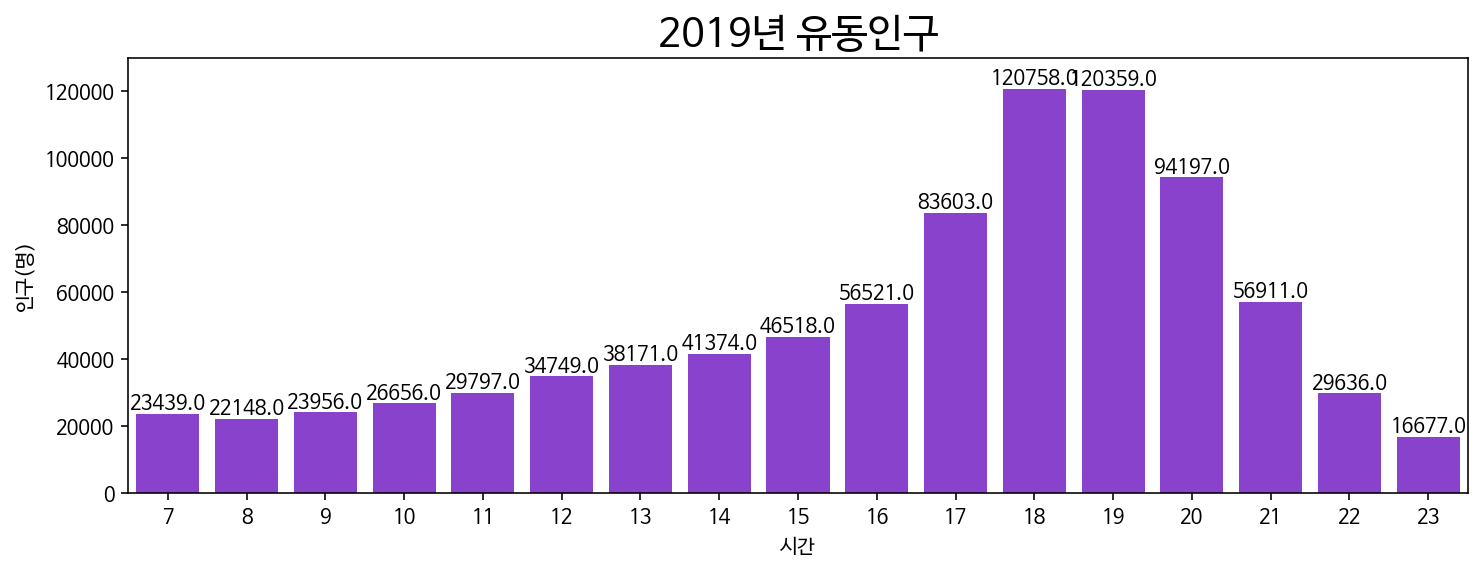

In [30]:
# 2019년 집회지역의 유동 인구를 시간대별로 시각화한다. 

fig, ax = plt.subplots(figsize=(12,4))
ax = sns.barplot(x='시간', y='value', data=local_2019_result.reset_index(), estimator=sum,  ci=None, color="blueviolet")
ax.set_title('2019년 유동인구', fontsize=20)
ax.set_ylabel('인구(명)')
ax.set_ylim(0, 130000)
for p in ax.patches:
  ax.annotate(format(p.get_height(),), (p.get_x() + p.get_width() / 2., p.get_height()), 
              ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

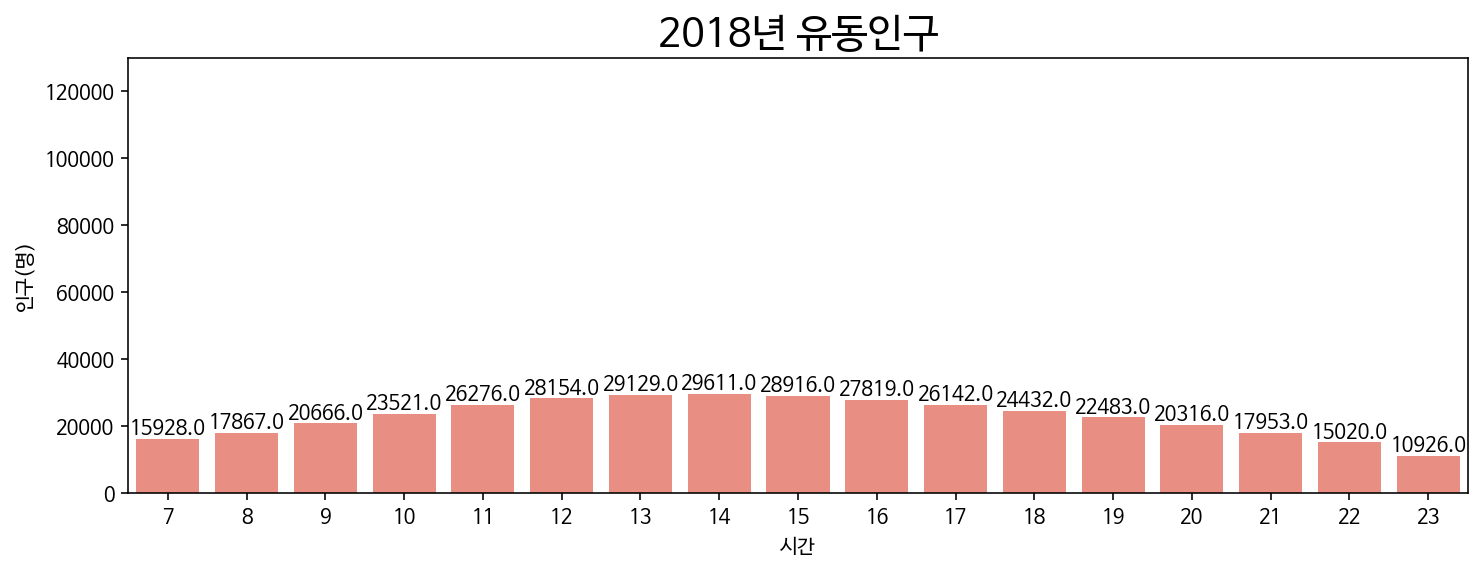

In [31]:
# 2018년 집회지역의 유동 인구를 시간대별로 시각화한다.

fig, ax = plt.subplots(figsize=(12,4))
ax = sns.barplot(x='시간', y='value', data=local_2018_result.reset_index(), estimator=sum,  ci=None, color="salmon")
ax.set_title('2018년 유동인구', fontsize=20)
ax.set_ylabel('인구(명)')
ax.set_ylim(0, 130000)
for p in ax.patches:
  ax.annotate(format(p.get_height(),), (p.get_x() + p.get_width() / 2., p.get_height()), 
              ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


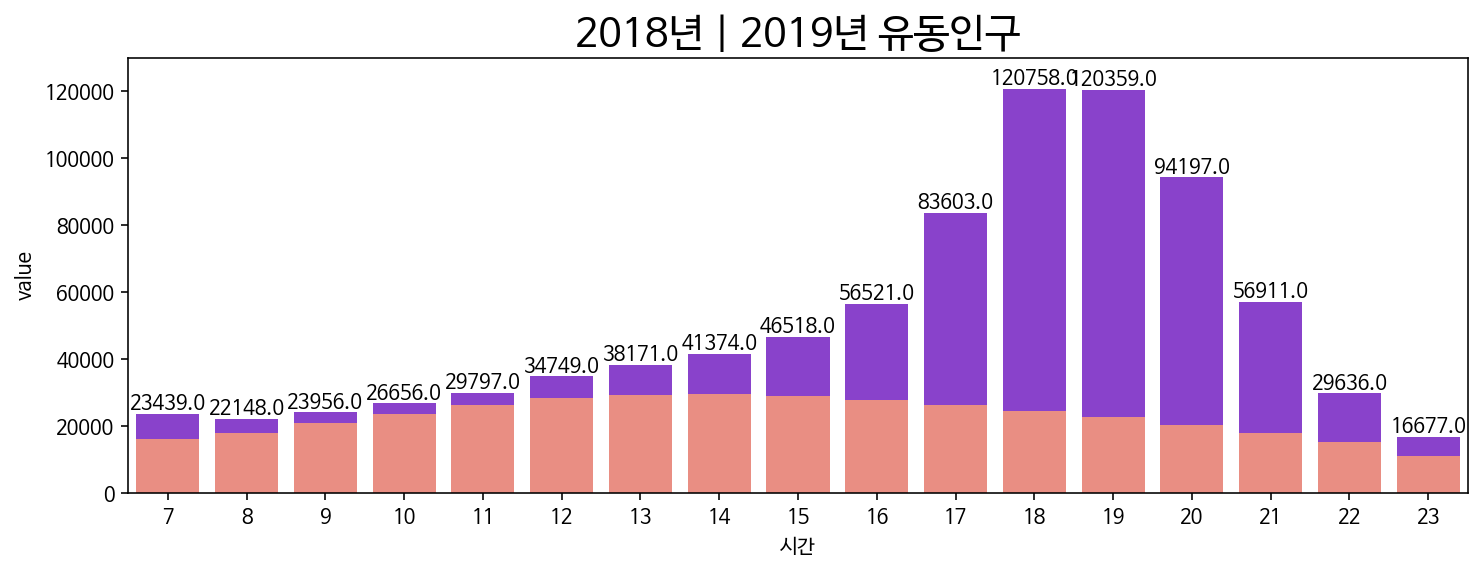

In [32]:
# 2018년과 2019의 집회지역 시간대별 유동인구를 비교하다.

fig, ax = plt.subplots(figsize=(12,4))
ax = sns.barplot(x='시간', y='value', data=local_2019_result.reset_index(), estimator=sum,  ci=None, color="blueviolet")
ax.set_title('2018년 | 2019년 유동인구', fontsize=20)
ax.set_ylim(0, 130000)
ax.set_ylabel('인구(명)')
for p in ax.patches:
  ax.annotate(format(p.get_height(),), (p.get_x() + p.get_width() / 2., p.get_height()), 
              ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
ax = sns.barplot(x='시간', y='value', data=local_2018_result.reset_index(), estimator=sum,  ci=None, color="salmon")

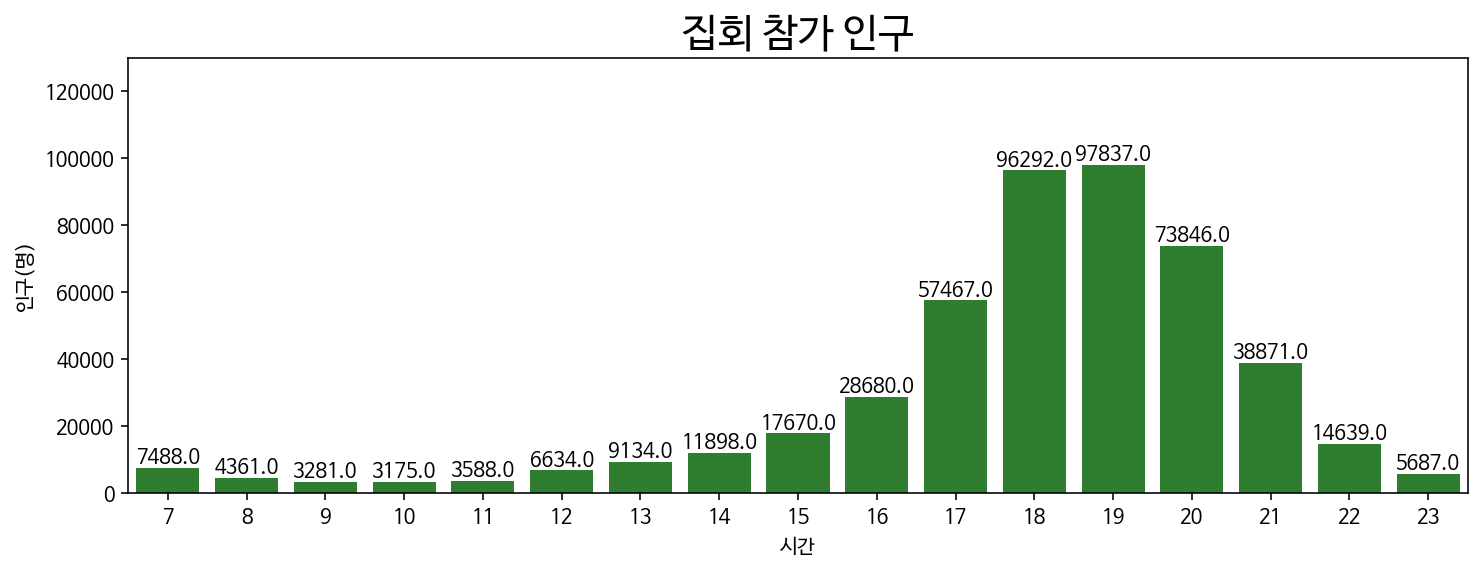

In [33]:
# 집회 참가 인구만을 시각화한다. 
fig, ax = plt.subplots(figsize=(12,4))
ax = sns.barplot(x='시간', y='value', data=local_gap, estimator=sum,  ci=None, color="forestgreen")
ax.set_title('집회 참가 인구', fontsize=20)
ax.set_ylabel('인구(명)')
ax.set_ylim(0, 130000)
for p in ax.patches:
  ax.annotate(format(p.get_height(),), (p.get_x() + p.get_width() / 2., p.get_height()), 
              ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

## 2.2. 참가 인원의 성별/연령별 분포

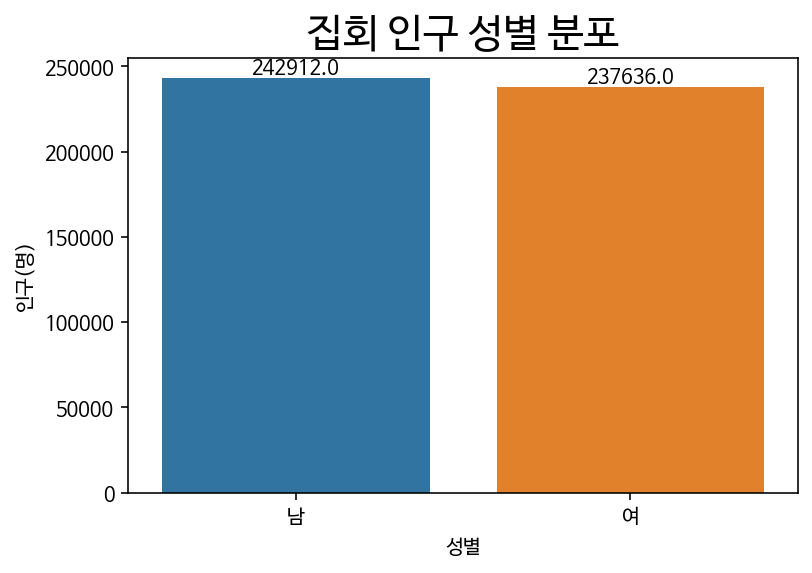

In [34]:
# 집회 참가 인구 성별 분포
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(x='성별', y='value', data=local_gap, estimator=sum,  ci=None)
ax.set_title('집회 인구 성별 분포', fontsize=20)
ax.set_ylabel('인구(명)')
for p in ax.patches:
  ax.annotate(format(p.get_height(),), (p.get_x() + p.get_width() / 2., p.get_height()), 
              ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

Text(0, 0.5, '인구(명)')

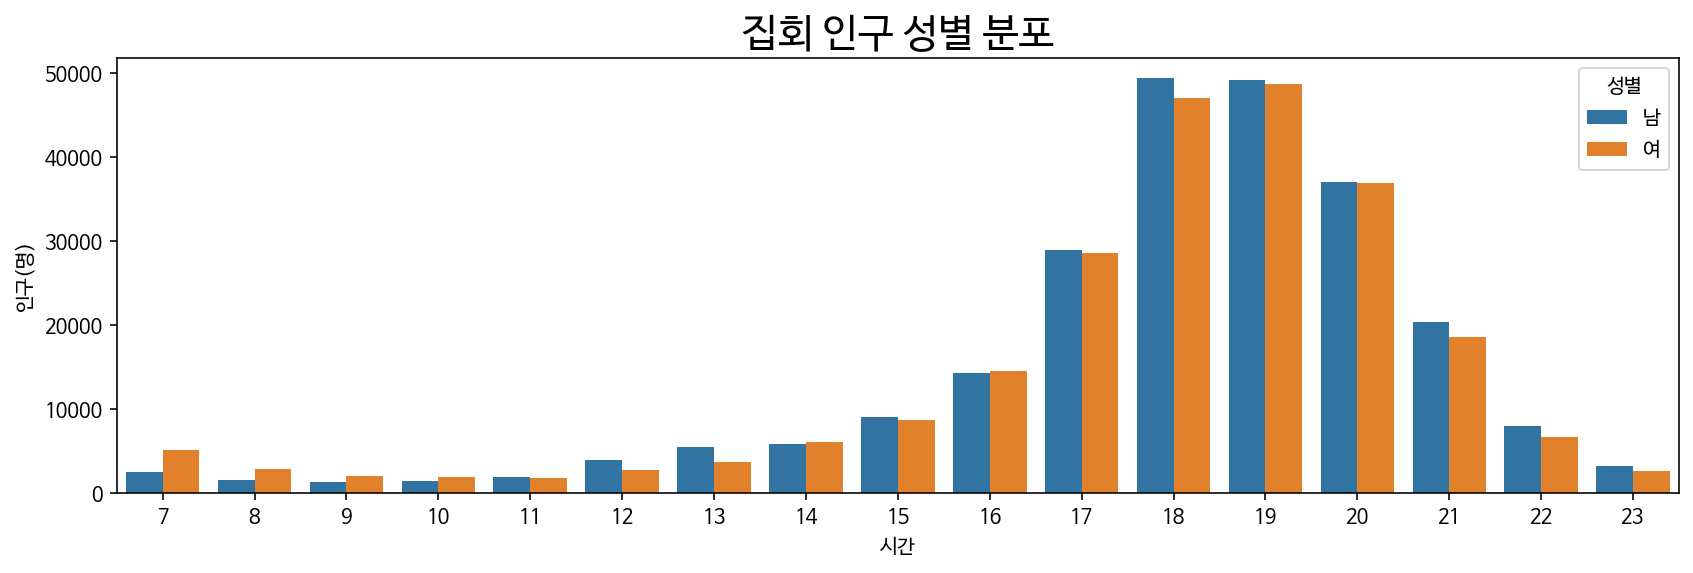

In [35]:
# 집회 참가 인구 성별 분포
fig, ax = plt.subplots(figsize=(14,4))
ax = sns.barplot(x='시간', y='value', hue='성별', data=local_gap, estimator=sum,  ci=None)
ax.set_title('집회 인구 성별 분포', fontsize=20)
ax.set_ylabel('인구(명)')


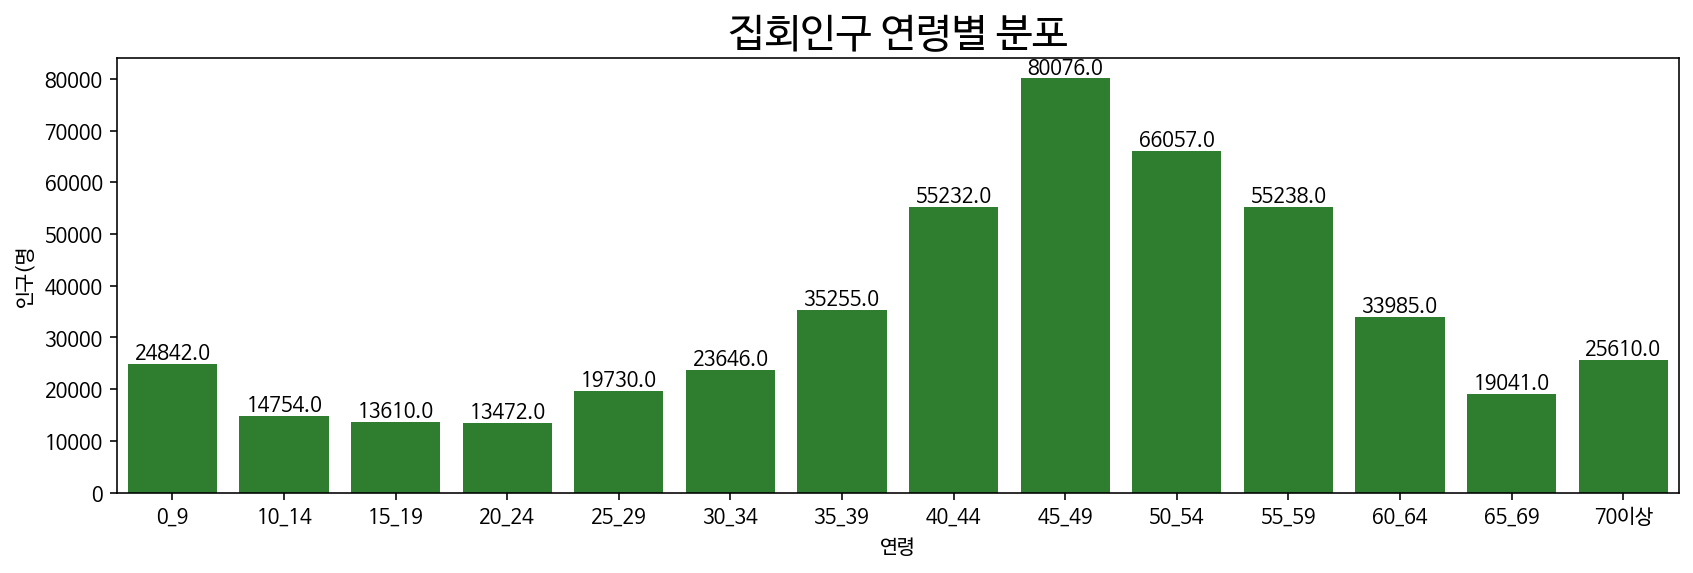

In [36]:
fig, ax = plt.subplots(figsize=(14,4))
ax = sns.barplot(x='연령', y='value', data=local_gap, estimator=sum, ci=None, color='forestgreen')
ax.set_title('집회인구 연령별 분포', fontsize=20)
ax.set_ylabel('인구(명')
for p in ax.patches:
  ax.annotate(format(p.get_height(),), (p.get_x() + p.get_width() / 2., p.get_height()), 
              ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


In [37]:
local_gap

,시간,성별,연령,value
0,7,남,0_9,-22.0
1,7,남,0_9,-13.0
2,7,남,0_9,41.0
3,7,남,0_9,-1.0
4,7,남,0_9,-9.0
...,...,...,...,...
5707,23,여,70이상,-6.0
5708,23,여,70이상,-17.0
5709,23,여,70이상,27.0
5710,23,여,70이상,12.0


In [38]:
local_gap_grp = local_gap.groupby(['시간', '연령'])['value'].agg('sum').reset_index()
local_gap_grp

,시간,연령,value
0,7,0_9,89.0
1,7,10_14,59.0
2,7,15_19,606.0
3,7,20_24,337.0
4,7,25_29,579.0
...,...,...,...
233,23,50_54,744.0
234,23,55_59,614.0
235,23,60_64,417.0
236,23,65_69,258.0


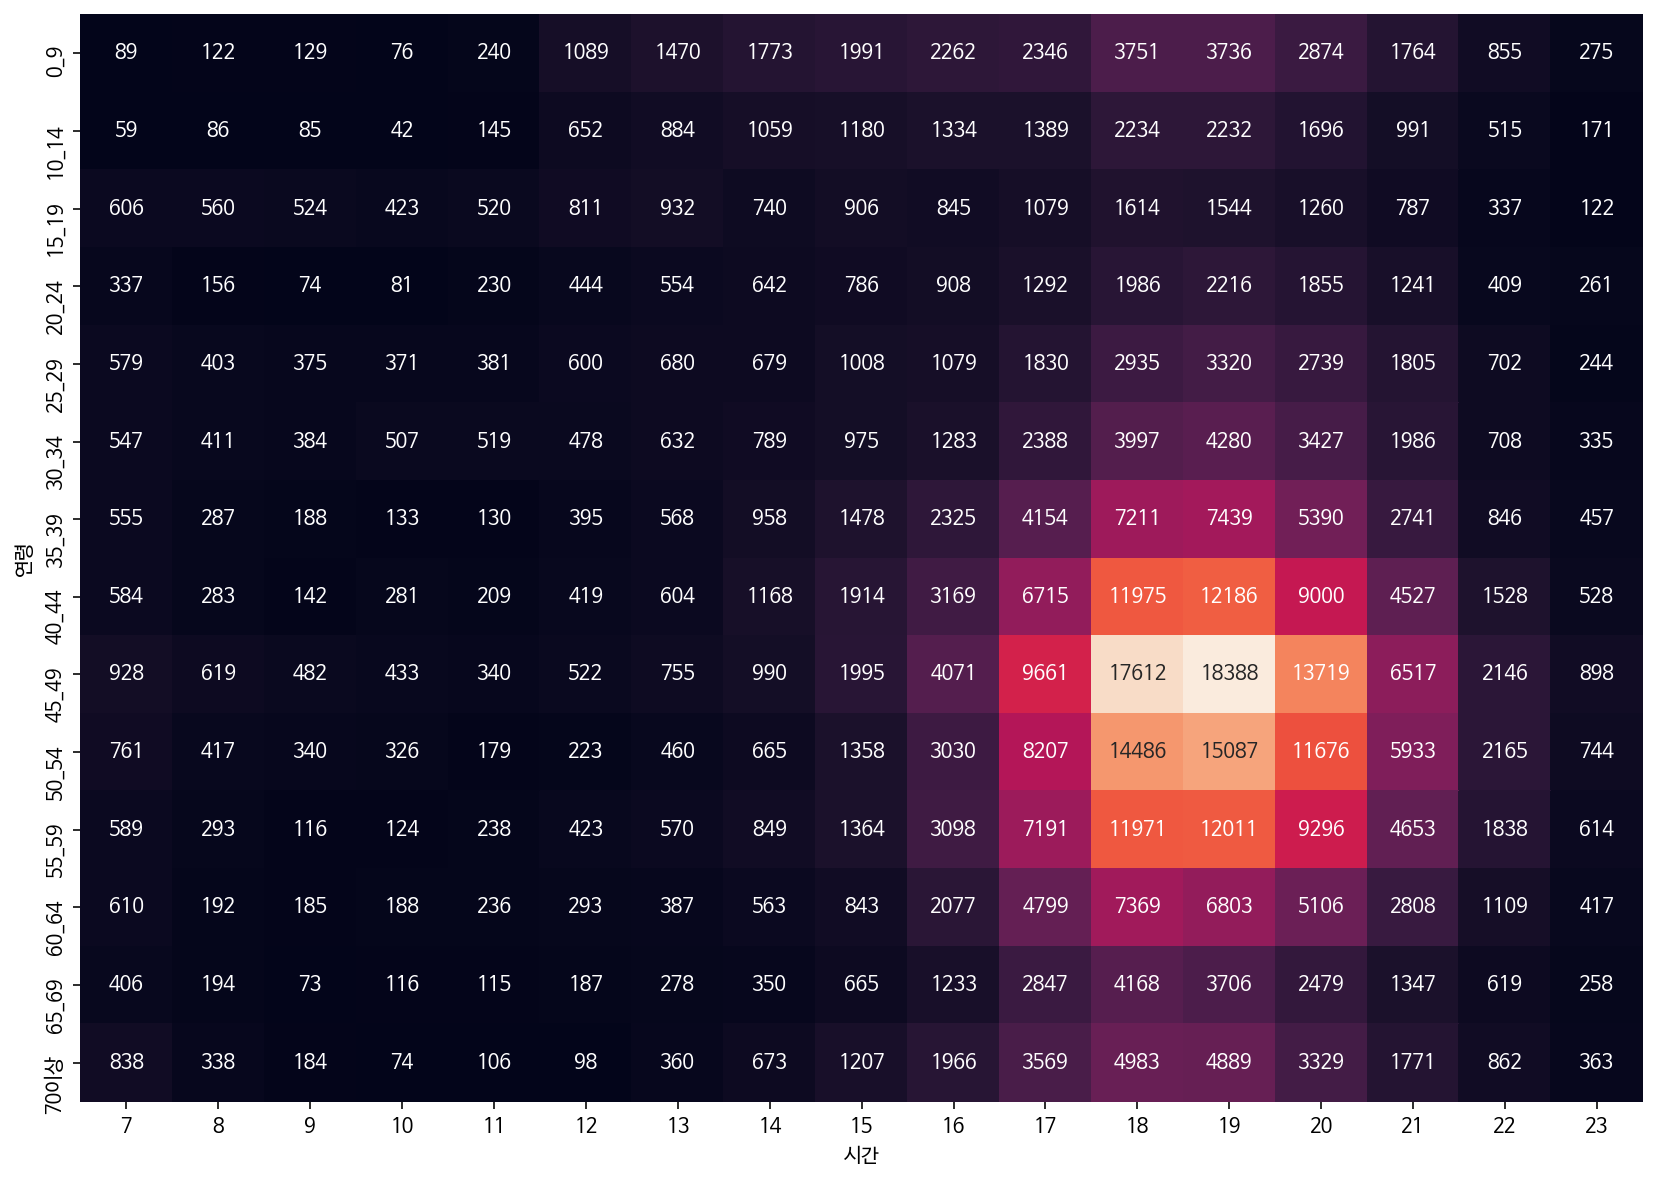

In [39]:
fig, ax = plt.subplots(figsize=(14,10))
ax = sns.heatmap(local_gap_grp.pivot('연령', '시간', 'value').astype(int), annot=True, fmt='d', cbar=False)

## 2.3. 참가 인원은 어디서 왔는지

In [40]:
metro_result.tail(3)

,시간,거주지,value,성별,연령,RESD_CD,RESC_NM
17708,23,41590,8.0,여,75이상,41590,경기 화성시
17709,23,42000,10.0,여,75이상,42000,강원
17710,23,46000,8.0,여,75이상,46000,전남


In [41]:
metro_sort = metro_result.groupby('RESC_NM')['value'].agg('sum').sort_values(ascending=False).reset_index()
metro_sort.head()

,RESC_NM,value
0,경기 성남시 분당구,21349.0
1,경기 부천시,13124.0
2,경기 용인시 수지구,12903.0
3,경기 남양주시,12622.0
4,충남,11797.0


Text(0, 0.5, '거주지')

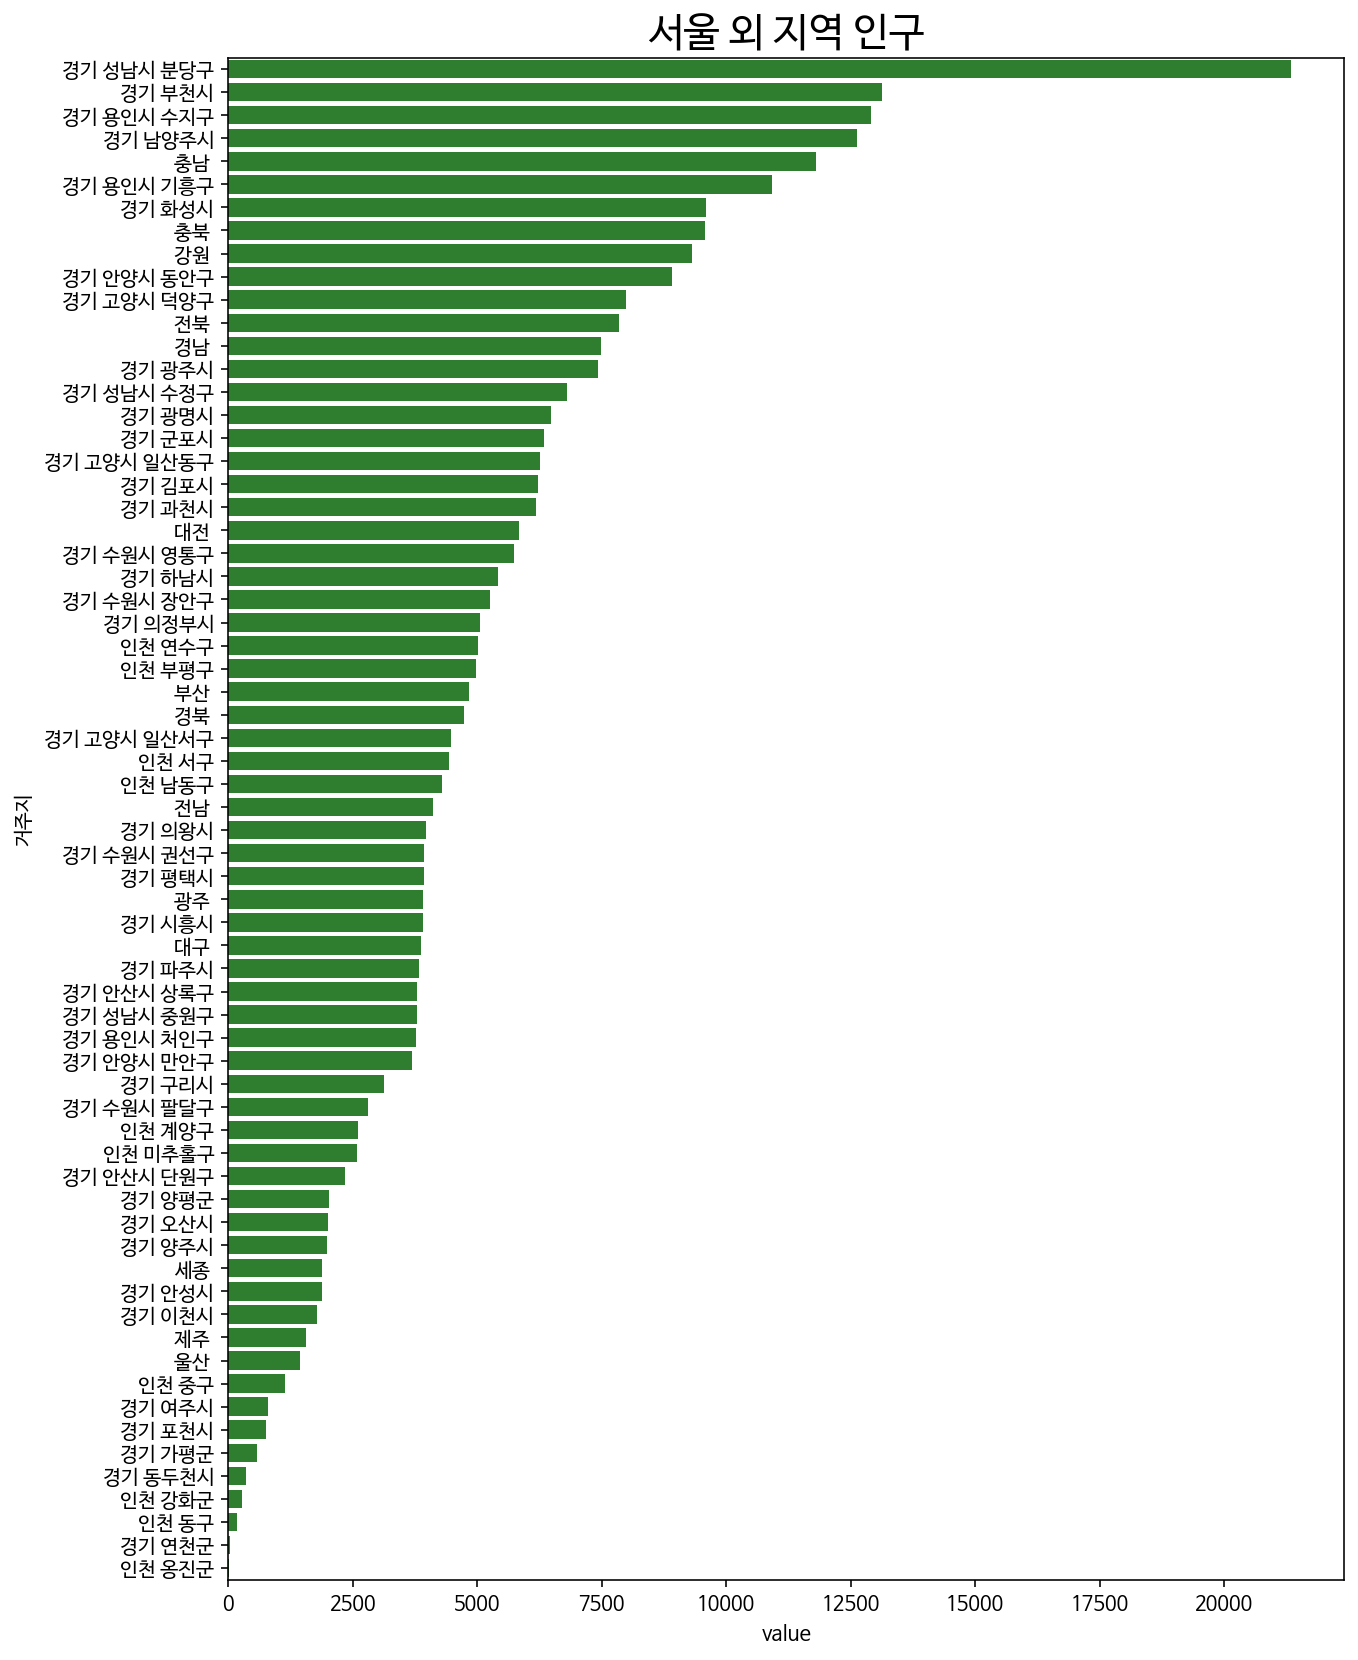

In [42]:
fig,ax = plt.subplots(figsize=(10,14))
ax = sns.barplot(x='value', y='RESC_NM', estimator=sum, data=metro_sort, color='forestgreen')
ax.set_title('서울 외 지역 인구', fontsize=20)
ax.set_ylabel('거주지')

In [43]:
inner_sort = inner_result.groupby('RESC_NM')['value'].agg('sum').sort_values(ascending=False).reset_index()
inner_sort.head()

,RESC_NM,value
0,서울 서초구,178646.0
1,서울 강남구,44456.0
2,서울 관악구,40311.0
3,서울 동작구,34241.0
4,서울 송파구,30866.0


Text(0, 0.5, '거주지')

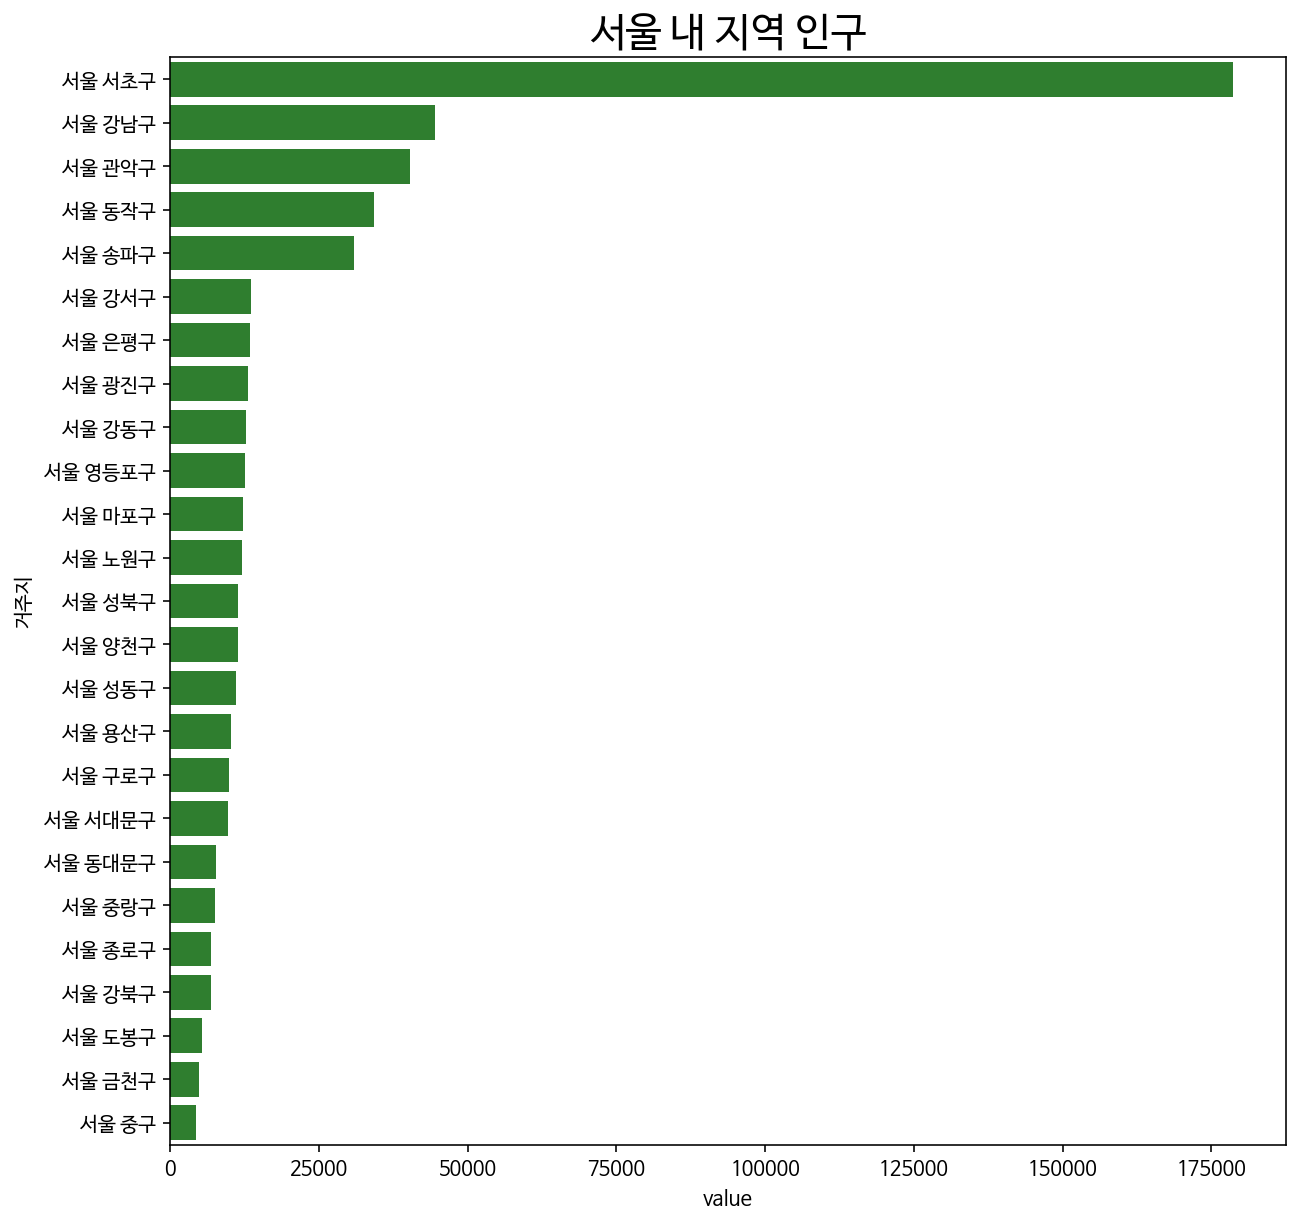

In [44]:
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x='value', y='RESC_NM', estimator=sum, data=inner_sort, color='forestgreen')
ax.set_title('서울 내 지역 인구', fontsize=20)
ax.set_ylabel('거주지')